In [1]:
import sys
import os
sys.path.append(os.path.abspath("../../../../"))

import pandas as pd
import utils
# Mining: multidupehack
# Plotting
import plot_automations as plotter

Loïc Cerf and Wagner Meira Jr. Complete Discovery of High-Quality Patterns in Large Numerical Tensors. In ICDE'14: Proceedings of the 30th International Conference on Data Engineering, pages 448–459. IEEE Computer Society, April 2014.

**1. Multidupehack input file**

In [2]:
df = pd.read_csv("../../../../01_color_clustering/non-weighted/omniart-post-color-clustering.csv")

In [3]:
color_clusters = pd.read_csv("../../../../01_color_clustering/non-weighted/color_centroids.csv")

In [4]:
utils.prepare_multidupehack_input_fuzzy(df, color_clusters, "decade", "fuzzy_decade_mining.txt")

**2. Itemset mining**

In [5]:
patterns_df = utils.parse_patterns("decade_patterns.txt", "decades")

In [6]:
hex_to_name = dict(zip(color_clusters['HEX'].str.upper(), color_clusters['name']))
    
patterns_df['colors_names'] = patterns_df['colors'].apply(
    lambda hex_list: [hex_to_name[hex.upper()] for hex in (eval(hex_list) if isinstance(hex_list, str) else hex_list)])

In [7]:
patterns_df

,decades,colors,n_decades,n_colors,support,colors_names
0,"[2010, 2000]","[#701308, #ED4D36, #EED7D4, #AF9490, #F00C0E, ...",2,60,120,"[reddy-brown, tomato, pale-pink, mushroom, bri..."
1,"[1810, 1990, 1850, 1980, 1860, 1890, 1910, 193...","[#EED7D4, #A90908, #56151B, #902A21, #550404, ...",13,50,650,"[pale-pink, darkish-red, burgundy, red-brown, ..."
2,"[1890, 1910, 1930, 1950, 1960, 1920, 2010, 2000]","[#EED7D4, #AF9490, #513633, #F00C0E, #E72F3D, ...",8,58,464,"[pale-pink, mushroom, purple-brown, bright-red..."
3,"[1980, 1890, 1910, 1930, 1950, 1960, 1920, 201...","[#EED7D4, #AF9490, #955B5D, #F00C0E, #E72F3D, ...",9,57,513,"[pale-pink, mushroom, brownish, bright-red, st..."
4,"[1990, 1850, 1860, 1890, 1910, 1930, 1950, 196...","[#EED7D4, #513633, #F00C0E, #E72F3D, #CC090B, ...",11,57,627,"[pale-pink, purple-brown, bright-red, strawber..."
...,...,...,...,...,...,...
6366,"[790, -40, 1160, 1140, 870, -250, 1000, 960, -...","[#ECDCDD, #955B5D]",103,2,206,"[light-grey, brownish]"
6367,"[700, 450, 550, 890, 300, 790, 680, 400, -40, ...",[#ECDCDD],111,1,111,[light-grey]
6368,"[610, 320, 790, -380, 1050, 1110, -40, 1160, 1...","[#C68D8B, #955B5D]",111,2,222,"[greyish-pink, brownish]"
6369,"[730, 610, 320, 790, -380, 1030, 1050, 1110, -...",[#C68D8B],114,1,114,[greyish-pink]


Plot saved to images/decade_patterns_per_support_count.png


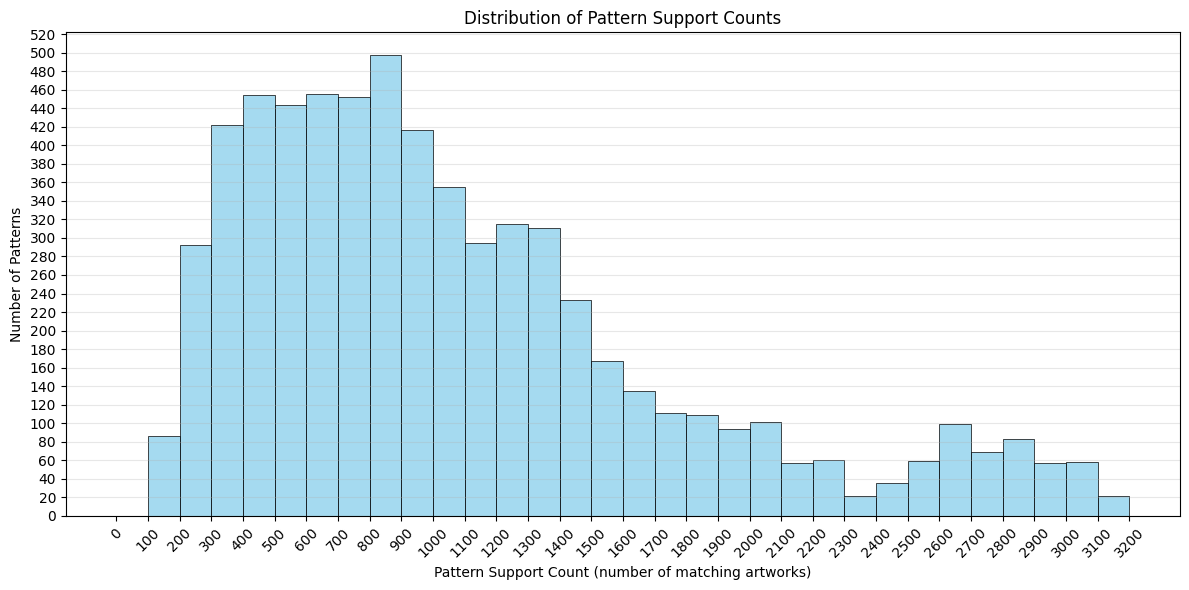

In [8]:
plotter.plot_support_analysis(patterns_df, "images/decade_patterns_per_support_count.png")

Plot saved to images/decade_n_decades_per_pattern.png


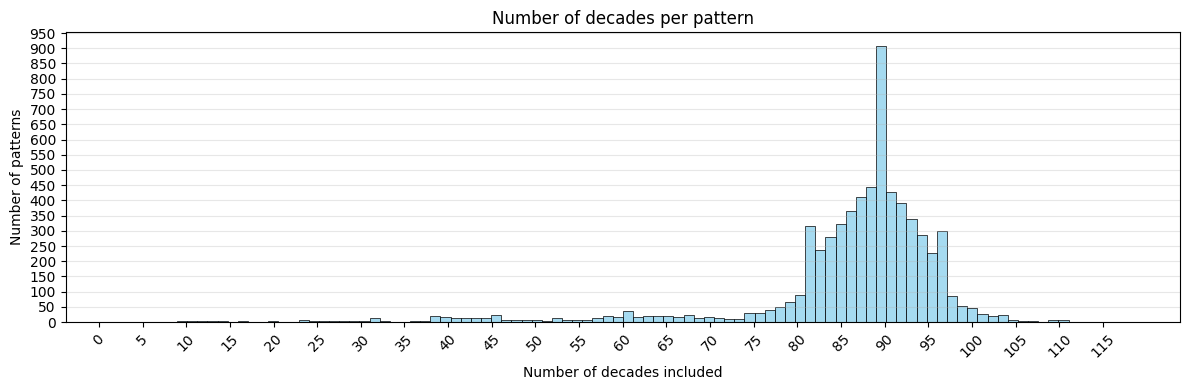

In [9]:
plotter.plot_pattern_size_distribution(patterns_df, "decades", "images/decade_n_decades_per_pattern.png")

Plot saved to images/decade_n_colors_per_pattern.png


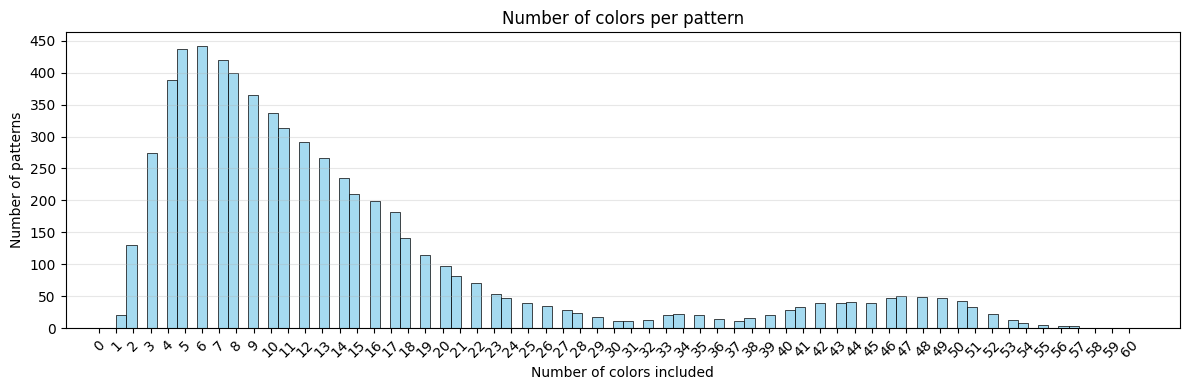

In [10]:
plotter.plot_pattern_size_distribution(patterns_df, "colors", "images/decade_n_colors_per_pattern.png")

Plot saved to images/decade_pattern_frequency_by_starting_decade.png


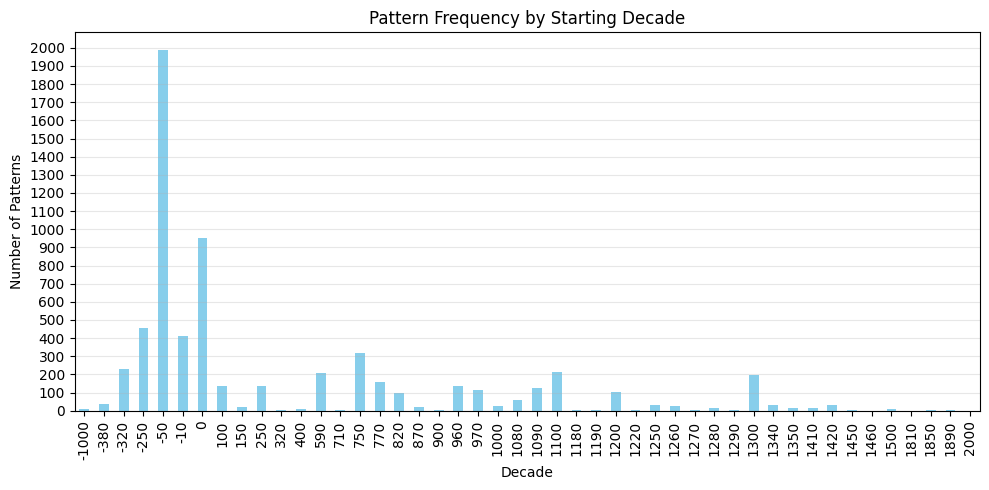

In [11]:
plotter.plot_temporal_patterns(patterns_df, "images/decade_pattern_frequency_by_starting_decade.png")

In [12]:
plotter.plot_color_cooccurrence_matrix(patterns_df, save_path="images/decade_color_cooccurrence_matrix.png")

In [ ]:
patterns_df['decades_range'] = patterns_df['decades'].apply(
    lambda x: f"{min(int(d) for d in x)}-{max(int(d) for d in x)}" 
    if min(int(d) for d in x) != max(int(d) for d in x) 
    else str(min(int(d) for d in x))
)

In [ ]:
unique_decade_ranges = patterns_df['decades_range'].unique()

In [ ]:
unique_decade_ranges

In [ ]:
for decade_range in unique_decade_ranges:
    plotter.plot_color_grid(patterns_df, "decades", decade_range, save_path=f"images/color_palettes/{decade_range}.png")